# MACHINE LEARNING IN PRODUCT CATEGORIZATION:
## APPLICATION OF A SUPERVISED LEARNING MODEL IN A REAL E-COMMERCE DATASET

Using a machine learning approach, this project will show how to implement a
simple and fast solution to the product categorization problem.

## 1 DATA EXPLORATION
First let's take a look on our original data, a Walmart dataset with some millions of products.

### 1.1 PRINT SAMPLE (ORIGINAL DATA)

In [40]:
# coding=utf-8

# import pandas
import pandas as pd

# 1.2 GB
INPUT_FILE = 'dataset/zxpd_201712121136_12011_38441474.csv'

# read input file
data = pd.read_csv(INPUT_FILE, sep=';', encoding='utf-8', names=['programId',
                                                                 'zupid',
                                                                 'name',
                                                                 'desc',
                                                                 'price',
                                                                 'priceOld',
                                                                 'brand',
                                                                 'date',
                                                                 'medium',
                                                                 'large',
                                                                 'link',
                                                                 'path',
                                                                 'main',
                                                                 'sub',
                                                                 'third',
                                                                 'ean',
                                                                 'small',
                                                                 'available',
                                                                 'img1',
                                                                 'gender'])

# print sample
data.head(10)


,programId,zupid,name,desc,price,priceOld,brand,date,medium,large,link,path,main,sub,third,ean,small,available,img1,gender
0,12011,4e0f8ed0f8a7e6aa608ca9b30978330c,Jogo Campeiro Inox 2 Pçs Corinthians 29899110 ...,NaN,1898.90,2183.74,Tramontina,23/11/2017 11:03:00,https://static.wmobjects.com.br/imgres/arquivo...,NaN,http://ad.zanox.com/ppc/?38441474C295166823&UL...,Utilidades domésticas / Faqueiros e Talheres /...,NaN,NaN,NaN,7.891112e+12,NaN,Disponibilidade:false,NaN,NaN
1,12011,73fd3def500bbe636f18791fe64e2865,Kit Superlux C/05 Mics D1 Pra D5,NaN,1035.00,NaN,Superlux,11/11/2017 11:03:00,https://static.wmobjects.com.br/imgres/arquivo...,NaN,http://ad.zanox.com/ppc/?38441474C295166823&UL...,Instrumentos Musicais / Equipamentos de Áudio ...,NaN,NaN,NaN,2.005000e+12,NaN,Disponibilidade:false,NaN,NaN
2,12011,559bf59e0695aa722e50b685f234d550,Camisola em Cetim AE12,NaN,23.10,32.90,RMB Lingerie,10/03/2017 10:58:00,https://static.wmobjects.com.br/imgres/arquivo...,NaN,http://ad.zanox.com/ppc/?38441474C295166823&UL...,Moda / Moda íntima / Camisolas,NaN,NaN,NaN,NaN,NaN,Disponibilidade:false,NaN,NaN
3,12011,68b59b2bb310c07d78a8c6dccc9216d9,Vizzano 3050.104,NaN,129.99,189.99,Vizzano,21/06/2017 11:01:00,https://static.wmobjects.com.br/imgres/arquivo...,NaN,http://ad.zanox.com/ppc/?38441474C295166823&UL...,Moda / Calçados / Botas,NaN,NaN,NaN,NaN,NaN,Disponibilidade:false,NaN,NaN
4,12011,9240ec44776a38ab9857d32c11085f90,Jogo - Sonic and the Secret Rings - Wii,NaN,82.09,NaN,Sega,31/10/2017 10:50:00,https://static.wmobjects.com.br/imgres/arquivo...,NaN,http://ad.zanox.com/ppc/?38441474C295166823&UL...,Games / Nintendo / Jogos para Wii,NaN,NaN,NaN,NaN,NaN,Disponibilidade:false,NaN,NaN
5,12011,06ee2df8c0c45ee684f8aa6c577749e6,"Caixa de Óculos Conhaque, capacidade para 8 óc...",NaN,110.99,149.99,Porto Brink,30/09/2017 10:50:00,https://static.wmobjects.com.br/imgres/arquivo...,NaN,http://ad.zanox.com/ppc/?38441474C295166823&UL...,Moda / Óculos / Acessórios,NaN,NaN,NaN,7.899259e+12,NaN,Disponibilidade:true,NaN,NaN
6,12011,0b4c1586755a0fcc831054e88d49156a,Jogo - Socom: Confratation - PS3,NaN,138.00,NaN,Sony,31/10/2017 10:50:00,https://static.wmobjects.com.br/imgres/arquivo...,NaN,http://ad.zanox.com/ppc/?38441474C295166823&UL...,Games / Playstation / Jogos para PS3,NaN,NaN,NaN,NaN,NaN,Disponibilidade:false,NaN,NaN
7,12011,9a1abbf1b2c1a5b4d4b127c4ed8c7ecb,Bebe Conforto Casulo Bege até 13 Kg 403BE Lenox,NaN,644.91,741.65,Lenox,11/11/2017 11:03:00,https://static.wmobjects.com.br/imgres/arquivo...,NaN,http://ad.zanox.com/ppc/?38441474C295166823&UL...,Bebês e Crianças / Passeio / Bebê-confortos,NaN,NaN,NaN,7.896517e+12,NaN,Disponibilidade:false,NaN,NaN
8,12011,705d72fdd9fef80c139c5a1e0b42b812,Conjunto de cossinete BSPT 1/2 a 3/4 TRE4P Tander,NaN,154.00,NaN,Tander,28/10/2017 11:02:00,https://static.wmobjects.com.br/imgres/arquivo...,NaN,http://ad.zanox.com/ppc/?38441474C295166823&UL...,Ferramentas e Jardim / Fixação e Perfuração / ...,NaN,NaN,NaN,7.899646e+12,NaN,Disponibilidade:true,NaN,NaN
9,12011,9cc50eca1a3b90e40d2a78bbda17724d,Tênis Masculino Mont Car Zyron S4,NaN,39.99,NaN,Zyron,08/11/2016 12:28:00,https://static.wmobjects.com.br/imgres/arquivo...,NaN,http://ad.zanox.com/ppc/?38441474C295166823&UL...,Esporte e Lazer / Tênis e Calçados / Tênis,NaN,NaN,NaN,NaN,NaN,Disponibilidade:false,NaN,NaN


### 1.2 PRINT SIZE

In [41]:
import os

# get metadata
statinfo = os.stat(INPUT_FILE)

# print file size, in GB
print(format(statinfo.st_size / pow(1024, 3), '.2') + ' GB')

# print number or products (rows)
print(format(len(data), ',') + ' products')

# free memory
del data


1.2 GB
2,625,975 products


## 2 DATA PREPROCESSING
Now let's tranform the original data. We will normalize that, create new columns and remove all the useless information to our model, including ~1.4 millions of unavailable products.

In [45]:
from dsLib import *
from time import time

OUTPUT_FILE = 'dataset/preprocessed.csv'

# start time
start = time()

# dictionary {category : number or products}, helps to remove very reduced categories
categoryCount = {}

# read input file
with open(INPUT_FILE, 'r') as file:
    
    # for each line...    
    for line in file:
        
        # transform in list
        lst = transform_line(line)

        # get category
        category = zanox_category(lst)

        # increase the dictionary counter
        categoryCount[category] = 1 if (categoryCount.get(category) == None) else categoryCount[category] + 1

# open output file
output = open(OUTPUT_FILE, 'w')

# read input file
with open(INPUT_FILE, 'r') as file:
    
    # write header
    output.write(header())

    # for each line...
    for line in file:

        # transform in list
        lst = transform_line(line)

        # valid
        if not valid(lst, categoryCount):
            continue

        # apply changes
        line = format_line(lst)

        # save
        output.write(line)

# close file
output.close()

# print preprocessing time
print('{:.2f} seconds'.format(time() - start))


292.86 seconds


### 2.1 PRINT SAMPLE (PREPROCESSED DATA)

In [50]:
# read output file
data = pd.read_csv(OUTPUT_FILE, sep=';', header=0, encoding='utf-8', names=['name',
                                                                            'brand',
                                                                            'gender',
                                                                            'room',
                                                                            'vehicle',
                                                                            'console',
                                                                            'device',
                                                                            'pet',
                                                                            'mattress',
                                                                            'cup',
                                                                            'category'])

# print sample
data.head(100)


,name,brand,gender,room,vehicle,console,device,pet,mattress,cup,category
0,conjunto cossinete bspt 1 2,tander,,,,,,,,,Ferramentas e Jardim / Fixação e Perfuração / ...
1,bateria notebook hp,hp,,,,,2,,,,Acessórios de Tecnologia / Acessório Periféric...
2,bateria notebook hp,hp,,,,,2,,,,Acessórios de Tecnologia / Acessório Periféric...
3,bateria notebook hp,hp,,,,,2,,,,Acessórios de Tecnologia / Acessório Periféric...
4,capa flip cover,capa shop,,,,,1,,,,Acessórios de Tecnologia / Acessório Celulares...
5,bateria notebook hp,hp,,,,,2,,,,Acessórios de Tecnologia / Acessório Periféric...
6,bateria notebook hp,hp,,,,,2,,,,Acessórios de Tecnologia / Acessório Periféric...
7,mesa 0252 0,maxima,,,,,,,,,Móveis e Decoração / Área Externa / Mesas
8,blusa cava americana,amey,1,,,,,,,,Moda / Moda feminina / Blusas
9,blusa cava americana,amey,1,,,,,,,,Moda / Moda feminina / Blusas


### 2.2 PRINT SIZE

In [51]:
import os

# get metadata
statinfo = os.stat(OUTPUT_FILE)

# print file size, in GB
print(format(statinfo.st_size / pow(1024,3),'.2') + ' GB')

# print number or products (rows)
print(format(len(data),',') + ' products')

# free memory
del data

0.12 GB
1,228,176 products


## 3 IMPLEMENTATION
With our dataset ready, let's read, encode and train the data. And, to finish, let's predict the product categories with our Decision Tree classifier.

In [1]:
from mlLib import *
import pandas as pd
import numpy as np
from time import time
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

INPUT_FILE = 'dataset/preprocessed.csv'

NUMBER_OF_FEATURES = 10

# start time
start = time()

# read data
data = pd.read_csv(INPUT_FILE, sep=';', header=0, converters={'price': float}, encoding='utf-8')

# price scaling
# data['price'] = np.log(data['price'])

# feature data (all rows, all columns except the last)
X_all = data.iloc[:, :data.shape[1] - 1]

# target data (all rows, only the last column)
y_all = data.iloc[:, data.shape[1] - 1]

# save header
header = data.columns.values

# save memory
del data

# encode features
X_encoder = []
for col in range(0, NUMBER_OF_FEATURES):
    X_encoder.append(preprocessing.LabelEncoder())
    X_encoder[col].fit(X_all.iloc[:, col].astype('str'))
    X_all.iloc[:, col] = X_encoder[col].transform(X_all.iloc[:, col].astype('str'))

# encode labels
y_encoder = preprocessing.LabelEncoder()
y_encoder.fit(y_all)
y_all = y_encoder.transform(y_all)

# shuffle and split the dataset into training and testing points
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2, random_state=55)

# initialize the classifier
# Decision Tree: 90.12%, 52s
clf = DecisionTreeClassifier(criterion='entropy', max_depth=None,
                             max_features=None, max_leaf_nodes=None,
                             min_impurity_decrease=0.0, min_impurity_split=None,
                             min_samples_leaf=1, min_samples_split=2,
                             min_weight_fraction_leaf=0.0, presort=False, random_state=86,
                             splitter='random')

# KNeighbors: 89.21%, 75s
# clf = KNeighborsClassifier(algorithm='kd_tree', leaf_size=10, metric='manhattan',
#                            metric_params=None, n_jobs=-1, n_neighbors=4, p=1,
#                            weights='distance')

# grid search
# clf = best_estimator(clf, X_train, y_train)

# fit
clf = clf.fit(X_train, y_train)

# predict (save memory!)
# predict_loop(clf, X_test, y_test, X_encoder, y_encoder)

# predict (no output)
print('accuracy: {:.2f}%'.format(100. * accuracy_score(y_test, clf.predict(X_test))))

# print processing time
print('{:.2f} seconds'.format(time() - start))


accuracy: 90.12%
53.45 seconds


# 4 RESULTS
So our final model was able to train e predict ~1.2 million of products in 53 seconds with 90% of accuracy. Not bad.

If you want to visualize the wrong predictions, uncomment the *predict_loop()* method.

## 4.1 Feature Importances
Here we can visualize the importance of each feature for our model.

Feature Ranking:

1	0.7265	name
2	0.1172	room
3	0.0805	brand
4	0.0257	device
5	0.0197	vehicle
6	0.0173	gender
7	0.0054	mattress
8	0.0048	pet
9	0.0018	cup
10	0.0011	console


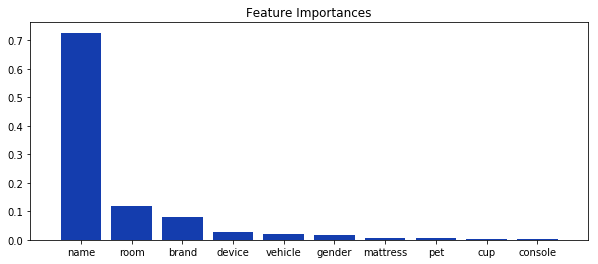

In [2]:
import matplotlib.pyplot as plt

# get importances from classifier
importances = clf.feature_importances_
std = np.std([clf.feature_importances_], axis=0)
indices = np.argsort(importances)[::-1]

feature_names = []
for i in indices:
    feature_names.append(header[i])

# ranking
print("Feature Ranking:\n")
X = X_train
for f in range(X.shape[1]):
    print("%d\t%.4f\t%s" % (f + 1, importances[indices[f]], feature_names[f]))

# plot
plt.figure(figsize=(10, 4))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], color="#143dae", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names)
plt.xlim([-1, X.shape[1]])
plt.show()


## 4.2 Decision Tree Visualization
It would be impossible to show the whole tree, but here are the root and the top decision nodes.

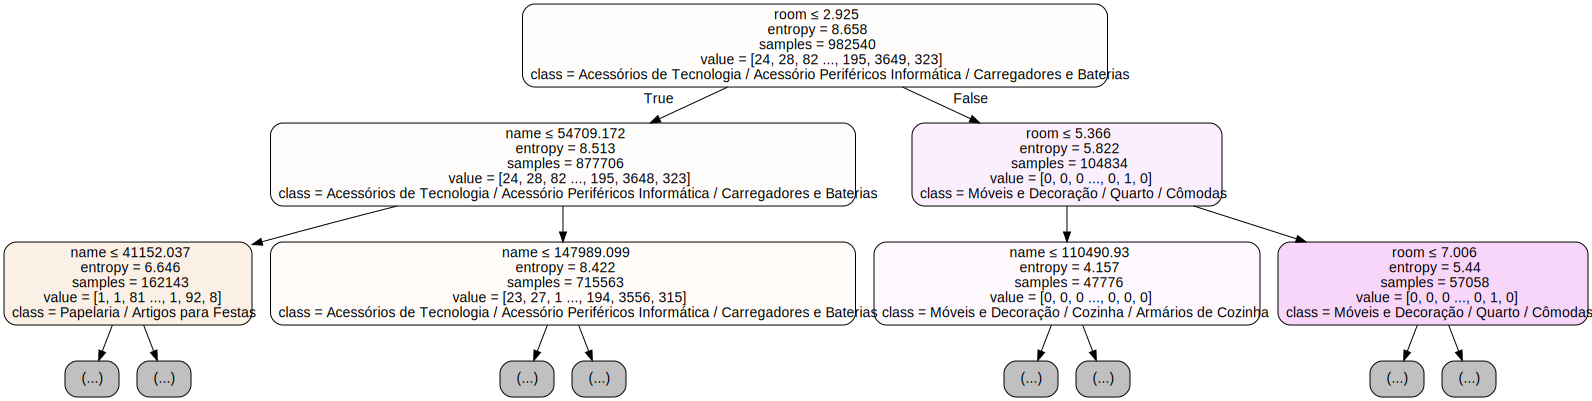

In [6]:
import graphviz
from sklearn import tree

# build tree
dot_data = tree.export_graphviz(clf, out_file=None,
                                class_names=decode_labels(y_all, y_encoder),
                                feature_names=np.delete(header, 10, 0), filled=True, rounded=True,
                                special_characters=True, max_depth=2)

# show
graphviz.Source(dot_data)
